<h1>Tackling an open problem</h1>

For this homework the idea is to hone our skills on exploring and plotting a dataset. You can either work with the Pokemon dataset that was given or download your own. If you opt to download your own I recommend you use one of the datasets available on kaggle,

https://www.kaggle.com/datasets

As they tend to be found in a clean format and are generally free to use.

Largely, the main objective is learning how to search the internet for new implementations you want to use on your code helping you develop your self-confidence.

There's no right or wrong, pick a dataset you enjoy and try to have some fun.
If you need, use the notebook from the previous session as a guideline.


In [15]:
# ideas: computer hardware over time, eg monitor res
# steam user data? os, keyb/gpad, most popular genre
# 

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:
PATH = 'Datasets/Steam Hardware Survey July 2020/'
df = {
    'gpu' : pd.read_csv(f'{PATH}gpu.csv'),
    'gpu directx' : pd.read_csv(f'{PATH}gpu_directx.csv'),
    'cpu frequency' : pd.read_csv(f'{PATH}cpu_frequency.csv'),
    'cpu cores' : pd.read_csv(f'{PATH}cpu_cores.csv')
}

 Here is the dataset from the Steam Hardware Survey 07/2020, showing the trends of gamers' hardware during the early months of the pandemic.

 First let's see what proportion of gamers were using each graphics card.

In [18]:
print(df['gpu'])

    Unnamed: 0                     GPU NAME     MAR     APR     MAY     JUN  \
0            0      NVIDIA GeForce GTX 1060  12.67%  12.01%  11.80%  11.73%   
1            1   NVIDIA GeForce GTX 1050 Ti   8.81%   8.48%   8.22%   8.34%   
2            2      NVIDIA GeForce GTX 1050   5.42%   5.42%   5.31%   5.31%   
3            3      NVIDIA GeForce GTX 1070   4.23%   4.22%   4.13%   4.05%   
4            4      NVIDIA GeForce GTX 1650   2.37%   2.50%   2.60%   2.99%   
..         ...                          ...     ...     ...     ...     ...   
93          93           Intel UHD Graphics       -       -       -       -   
94          94       NVIDIA GeForce GTS 450   0.16%   0.18%   0.18%   0.17%   
95          95     AMD Radeon R9 390 Series   0.17%   0.17%   0.17%   0.16%   
96          96       Intel HD Graphics 4400   0.15%   0.15%   0.15%   0.16%   
97          97                        Other   9.60%   9.96%   9.92%   9.54%   

       JUL % CHANGE  
0   11.64%   -0.09%  
1    8.

In [19]:
df['gpu'].head(10)

,Unnamed: 0,GPU NAME,MAR,APR,MAY,JUN,JUL,% CHANGE
0,0,NVIDIA GeForce GTX 1060,12.67%,12.01%,11.80%,11.73%,11.64%,-0.09%
1,1,NVIDIA GeForce GTX 1050 Ti,8.81%,8.48%,8.22%,8.34%,8.28%,-0.06%
2,2,NVIDIA GeForce GTX 1050,5.42%,5.42%,5.31%,5.31%,5.24%,-0.07%
3,3,NVIDIA GeForce GTX 1070,4.23%,4.22%,4.13%,4.05%,4.06%,+0.01%
4,4,NVIDIA GeForce GTX 1650,2.37%,2.50%,2.60%,2.99%,3.16%,+0.17%
5,5,NVIDIA GeForce GTX 1660 Ti,2.48%,2.55%,2.51%,2.71%,2.68%,-0.03%
6,6,NVIDIA GeForce RTX 2060,2.71%,2.31%,2.38%,2.53%,2.56%,+0.03%
7,7,NVIDIA GeForce GTX 1080,2.59%,2.54%,2.52%,2.48%,2.45%,-0.03%
8,8,AMD Radeon RX 580,1.95%,1.94%,2.03%,2.06%,2.16%,+0.10%
9,9,NVIDIA GeForce GTX 970,2.12%,2.19%,2.09%,2.04%,1.97%,-0.07%


The final column of this data set is '% CHANGE', but I'm not sure what times this change is between. We'll be finding that out later if possible.

Here are the different GPUs listed:

In [20]:
df['gpu']['GPU NAME']

0         NVIDIA GeForce GTX 1060
1      NVIDIA GeForce GTX 1050 Ti
2         NVIDIA GeForce GTX 1050
3         NVIDIA GeForce GTX 1070
4         NVIDIA GeForce GTX 1650
                 ...             
93             Intel UHD Graphics
94         NVIDIA GeForce GTS 450
95       AMD Radeon R9 390 Series
96         Intel HD Graphics 4400
97                          Other
Name: GPU NAME, Length: 98, dtype: object

For some background information, the RTX 30 series would be released later in the year, in September of 2020, to massive demand.

From Nvidia, the cards released in this time include SUPER editions for RTX 20 series laptop-only cards in April.

From AMD, the RX 5600 including XT editions were released in January.

In 2020 there were some notable factors affecting the GPU market:
- semiconductor shortage, relating to the pandemic
- rise of crypto-mining
- price scalpers, though particularly for the RTX 30 series

Nvidia would go on to produce more 20 series cards in 2021 due to the increased demand.

Anyway, here are the top 5 GPUs as of July 2020:

In [21]:
df['gpu'].sort_values(by=['JUL'], ascending=False).head(6)[1:]  # Slice notation to exclude the top category, which is 'other'

,Unnamed: 0,GPU NAME,MAR,APR,MAY,JUN,JUL,% CHANGE
1,1,NVIDIA GeForce GTX 1050 Ti,8.81%,8.48%,8.22%,8.34%,8.28%,-0.06%
2,2,NVIDIA GeForce GTX 1050,5.42%,5.42%,5.31%,5.31%,5.24%,-0.07%
3,3,NVIDIA GeForce GTX 1070,4.23%,4.22%,4.13%,4.05%,4.06%,+0.01%
4,4,NVIDIA GeForce GTX 1650,2.37%,2.50%,2.60%,2.99%,3.16%,+0.17%
5,5,NVIDIA GeForce GTX 1660 Ti,2.48%,2.55%,2.51%,2.71%,2.68%,-0.03%


In [ ]:
# show pie chart from jul
##df['gpu'].sort_values(by=['JUL'], ascending=False).head(11)[1:].plot.pie(y="JUL")
# commented because this block results in an error

Looks like the percent signs are causing issues, since they mean each value isn't an int. I looked online for a quick way to fix this.

In [23]:
def convertPercentage(percentage):
    return float(percentage.strip('%'))

print(convertPercentage('2.09%'))

2.09


In [24]:
for col in ['MAR', 'APR', 'MAY', 'JUN', 'JUL', '% CHANGE']:
    for i in range(len(df['gpu'][col])):
        try:
            df['gpu'].at[i, col] = convertPercentage(df['gpu'].at[i, col])
        except:
            df['gpu'].at[i, col] = 0.00

df['gpu']['JUL']



0     11.64
1      8.28
2      5.24
3      4.06
4      3.16
      ...  
93     0.17
94     0.16
95     0.15
96     0.15
97     9.89
Name: JUL, Length: 98, dtype: object

In [25]:
df['gpu'].head()

,Unnamed: 0,GPU NAME,MAR,APR,MAY,JUN,JUL,% CHANGE
0,0,NVIDIA GeForce GTX 1060,12.67,12.01,11.8,11.73,11.64,-0.09
1,1,NVIDIA GeForce GTX 1050 Ti,8.81,8.48,8.22,8.34,8.28,-0.06
2,2,NVIDIA GeForce GTX 1050,5.42,5.42,5.31,5.31,5.24,-0.07
3,3,NVIDIA GeForce GTX 1070,4.23,4.22,4.13,4.05,4.06,0.01
4,4,NVIDIA GeForce GTX 1650,2.37,2.5,2.6,2.99,3.16,0.17


C:\Users\CODELearner3\AppData\Local\Temp\ipykernel_11664\914853396.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gpu'].sort_values(by=['JUL'], ascending=False).head(11)[1:].plot.pie(y="JUL")


<Axes: ylabel='JUL'>

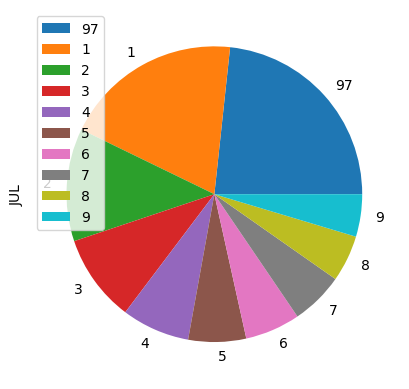

In [26]:
df['gpu'].sort_values(by=['JUL'], ascending=False).head(11)[1:].plot.pie(y="JUL")

Progress, but not the labels I expected/wanted. Time to look at some documentation.

In [27]:
df['gpu'] = df['gpu'].set_index('GPU NAME')

C:\Users\CODELearner3\AppData\Local\Temp\ipykernel_11664\1446514834.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gpu'][1:11].plot.pie(y="JUL")


<Axes: ylabel='JUL'>

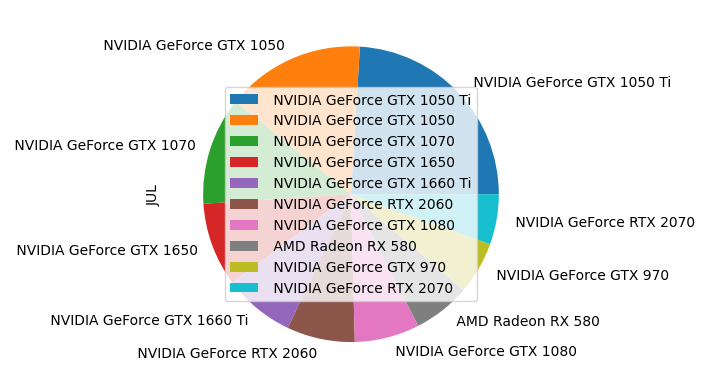

In [28]:
df['gpu'][1:11].plot.pie(y="JUL")

Success! Also managed to crop to the top ten only.

Now let's see how these ten changed over the course of the survey.

<Axes: xlabel='MAR', ylabel='JUL'>

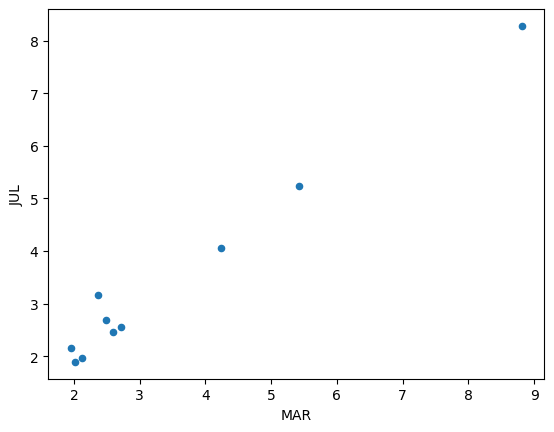

In [29]:
df['gpu'][1:11].plot.scatter(x='MAR', y='JUL')

This is what I got so far; not exactly what I would like though.

I'm trying to make a graph similar to the ones on Steam's own visualisation of this data:

Time for more documentation reading.